# 實作案例 - 波士頓房價預測

 1. 載入資料
 2. 檢視資料
 3. 資料探索
 3. 切分資料集成訓練集/測試集
 4. 建立模型 / 評估模型
 5. 增加特徵再進行模型預測評估

## 載入需要使用到的套件

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set()

## 載入波士頓資料集
sklearn官方文件：https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
可查看不同資料集(user guide)

In [41]:
house_price = datasets.load_boston()

In [44]:
#可查看裡面有多少項目
#house_price

In [4]:
#再載入資料集之後可使用keys這個函式去察看裡面主要有哪key值供我們去叫出來使用
print(house_price.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


### 資料描述

這個資料集包含了
* $506$筆資料
* $13$個欄位：`CRIM`,`ZN`, `INDUS`...
* $1$待預測值：Median Value(price)

這個13個特徵值很有意思，比如下面幾個：


`CRIM` :城市的人均犯罪率

`ZN`:住宅用地的比例

`INDUS`:非零售業的商業比例

`RM`：平均房間數

`DIS`:距離5個波士頓的就業中心的距離

`RAD`:徑向高速公路的可達性指數

`B`:城鎮的黑人比例相關欄位： $1000*(Bk-0.63)^2$

`LSTAT`:地位較低人士所占百分比


In [45]:
#使用DESCR這個函式可去看出上面所描述的資訊，以及更詳細的說明
print(house_price.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Feature

In [6]:
print(house_price.data)         ## 顯示 boston裡面的 data
print("-"*50)              ## 顯示分隔線 ----
print(house_price.data.shape)   ## 顯示 boston資料集 target的維度

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
--------------------------------------------------
(506, 13)


# Label

In [46]:
print(house_price.target)            ## 顯示 boston裡面的 target值，target指的是房價
print(house_price.target.shape)      ## 顯示 boston資料集 target的維度

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [47]:
#查看shape
print(house_price.data.shape)   ## 顯示 boston資料集 target的維度
print(house_price.target.shape)      ## 顯示 boston資料集 target的維度

(506, 13)
(506,)


### 將資料轉為dataframe格式
- 為了將我們讀進來的資料變得好處理，因此轉成dataframe的格式

- 將 `house_price` 中的 `house_price.data` 轉換成dataframe

- 將所有欄位命名為`house_price.feature_names`


In [49]:
#.data與.feature_names可再剛才的key值內找到
df = pd.DataFrame(data = house_price.data, columns = house_price.feature_names)

#datasets.target將士頓房地產資料的預測數值匯入到y
#target呼叫出的資料為y_label，資料集內部本身就有

df["price"] = house_price.target

### 用head函式查看前五筆資料

In [50]:
#以head函式查看加入了price之後的資料
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 觀察資料數量與型態
- 再確認完資料的對應之後 ，以info函式去查看他的筆數是否都有506以及資料的型態
- 以describe函式去查看資料及內的統計量

In [51]:
#查看columns是否有缺失值等情形
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [52]:
#查看統計變量(crim,rm)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 形成假設
在分析之前，先想想我們可能會對資料的關聯有甚麼樣的假設

- RM (平均房間數)： 平均房間數越多通常代表房子空間越大(坪數越高)，房價應會較高 (正向關聯)

- CRIM (犯罪率)： 犯罪率越高的地區因居住條件不好，因此房價應該相對較低  (負向關聯)

- LSTAT (低地位人民比例)： 周遭越多低社會經濟地位的鄰居同樣可能影響居住條件，因此房價亦較低 (負向關聯)

- DIS (到五個就業中心的加權距離)： 數值越高代表離就業中心越遠，可能越不好就業，房價應會降低  (負向關聯)

## 資料分析 - 探索性資料分析

## 探索price的分布

### 繪製密度函數圖
- 當我們要查看單變量的分布之時，最方便的方式是使用distplot()函數。

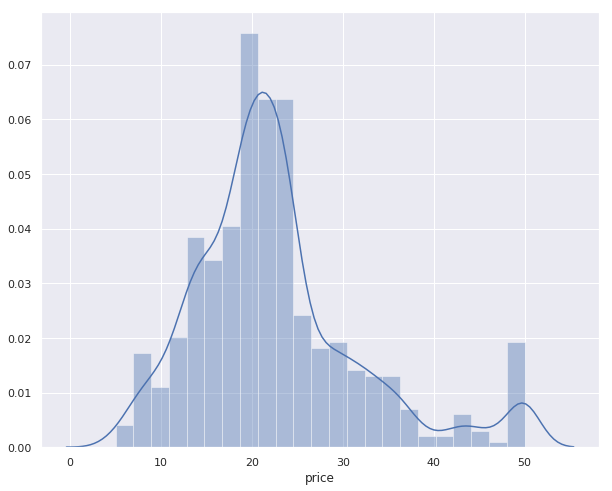

In [53]:
#以price繪製分布圖(dist)
#大部分的房價集中於20多，少數的房價偏高
#x = 房價(1000美),y = 機率密度(rate) 正比於出現的頻率
sns.distplot(df["price"])

In [54]:
#觀察此圖可以知道其變量的分佈，並可推算出outlier在哪裡
#使用統計量訂定極端值切點可以使用：mean +- (2*std)
#以此資料做訂定，切點約等於 22.5+ 2*9.2 = 41，超過41的值則為outlier，要處理的話就會針對這個值以上的做處理，我們要使用的就是mean跟std
df[["price"]].describe()

,price
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


## 探索各欄位與price的關係
- 探索完單一之後接著我們開始探索price與其他特徵的相關
- 先以correlation matrix檢查個相關係數
- 我們使用heatmap先對剛剛的假設做快速的檢驗

In [55]:
#correlation陣列查看各項相關係數
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


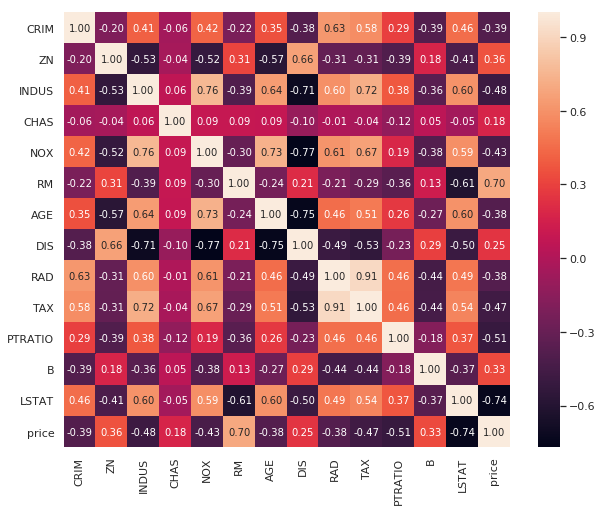

In [16]:
#使用seaborn畫出heatmap

plt.rcParams['figure.figsize'] = (10,8)

#heatmap第一個參數為放入要畫得值，annot為每一個方格是否要填入數值，fmt為只留到小數第二位
sns.heatmap(df.corr(),annot = df.corr(),fmt = '.2f');

In [17]:
#因為不整齊所以將其作sort，sort排序為負到正
#將column做排序並印出觀察
sort_columns = df.corr().sort_values('price')
print (sort_columns)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
ZN      -0.200469  1.000000 

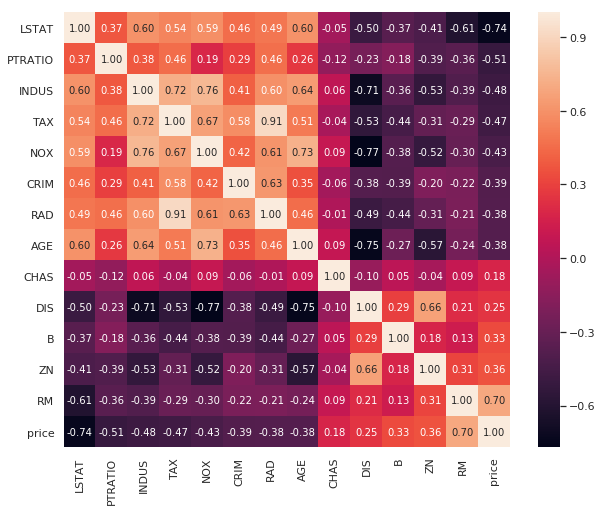

In [18]:
#畫出heatmap
plt.rcParams['figure.figsize'] = (10,8)

#取index當作排序的依據
sort_columns = df.corr().sort_values('price').index
corr = df[sort_columns].corr()

#annot為在上面呈現的數字
#".2f"表示float类型保留小数点后两位。
sns.heatmap(corr, annot=corr, fmt = '.2f')

## 更仔細的方式仍然是把散佈圖畫出來
- 觀察完相關係數後，我們想進一步去了解到每個數據的分佈是如何
- 這時候就需要使用散佈圖去看每筆資料的離散程度

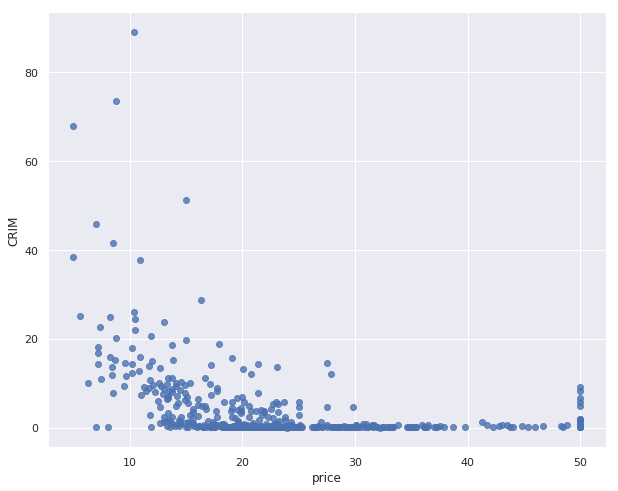

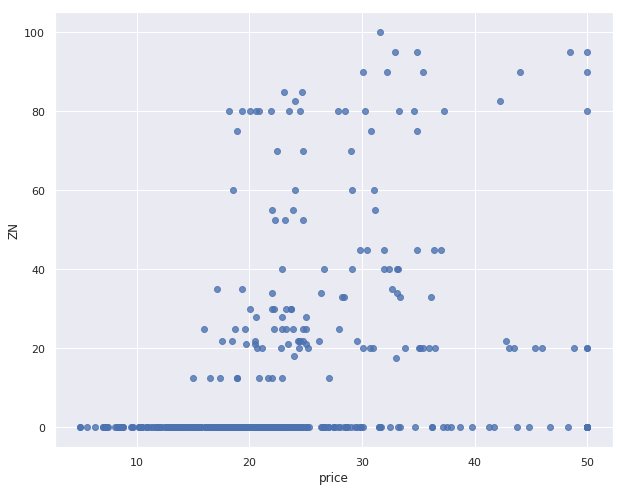

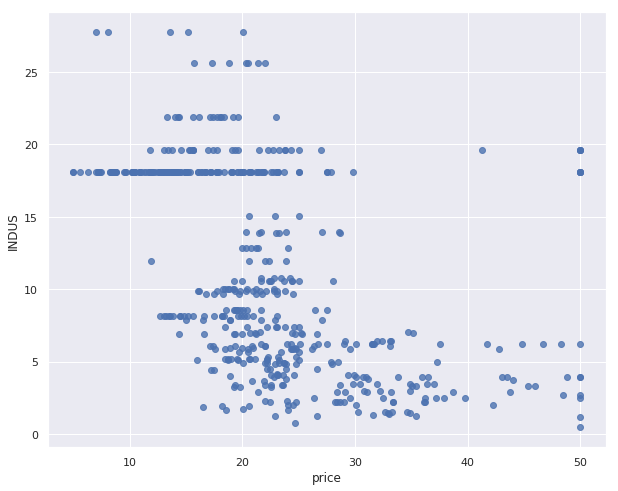

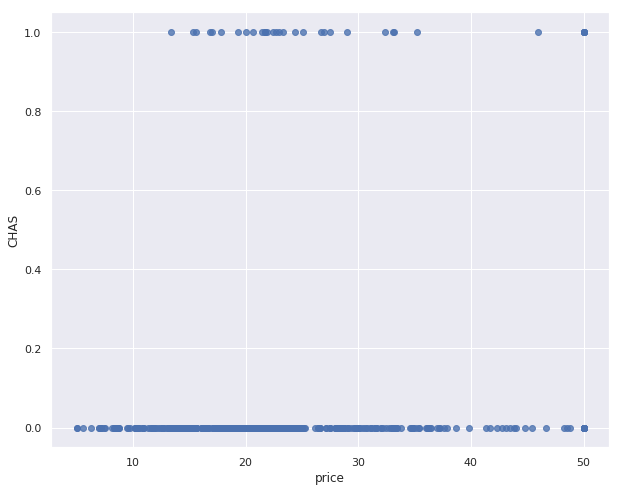

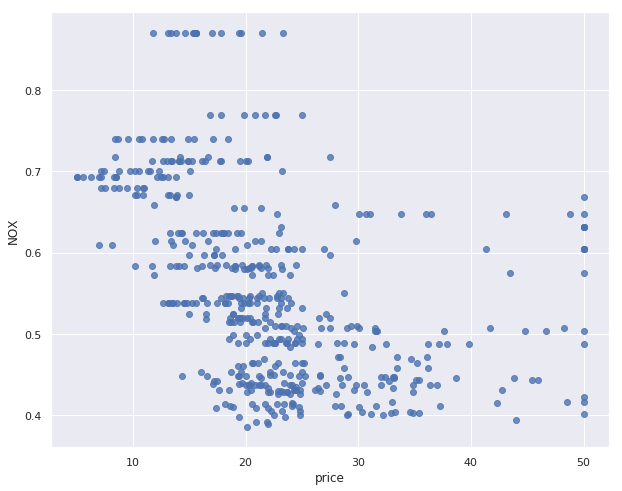

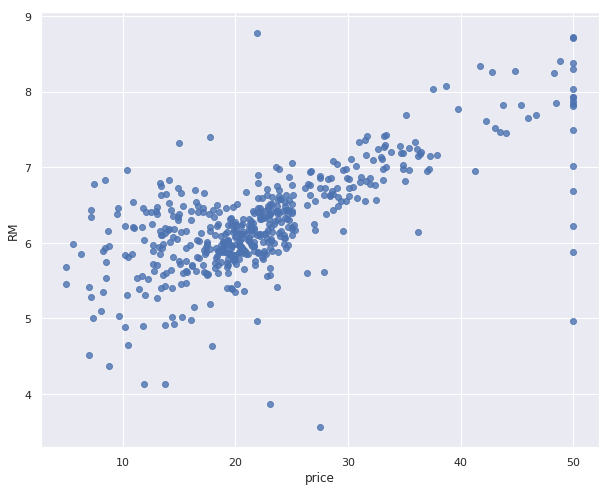

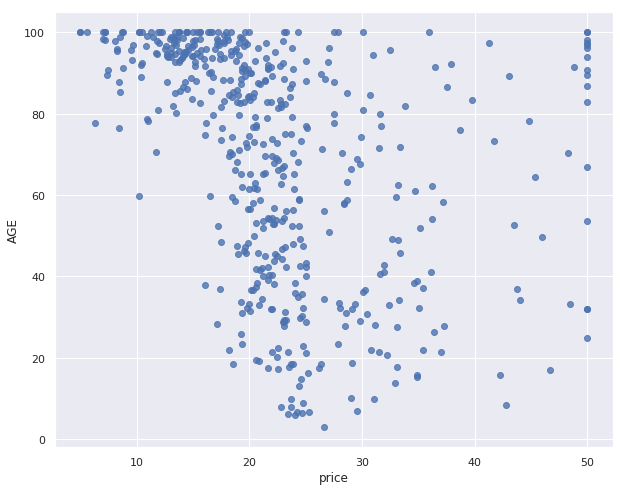

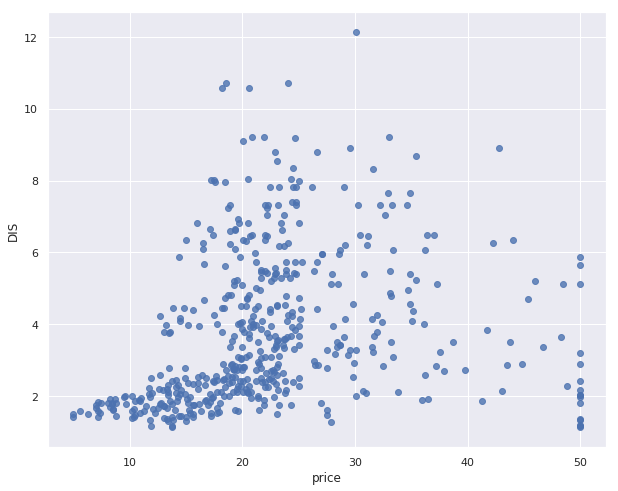

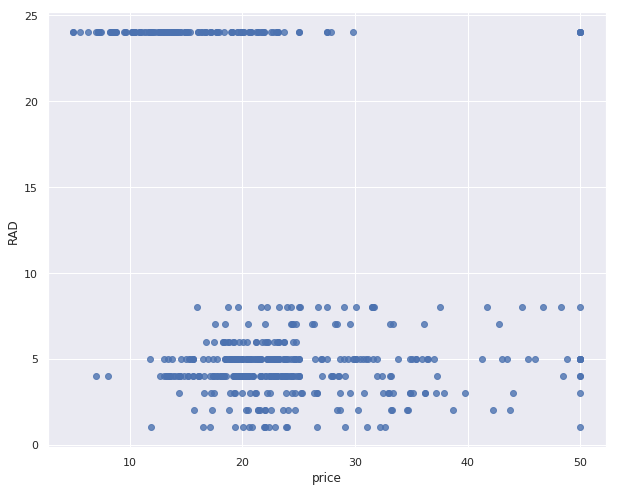

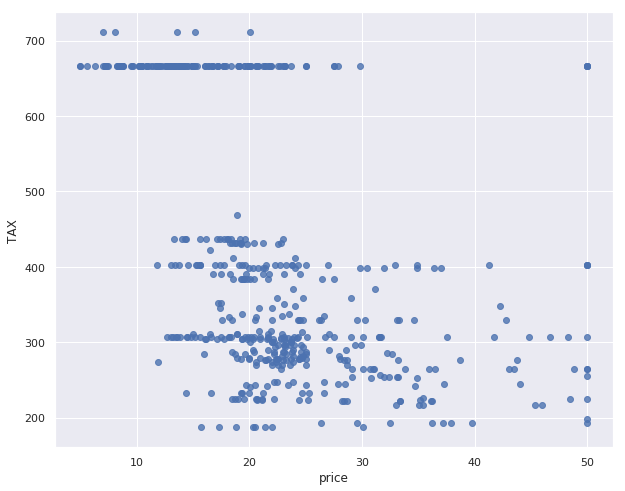

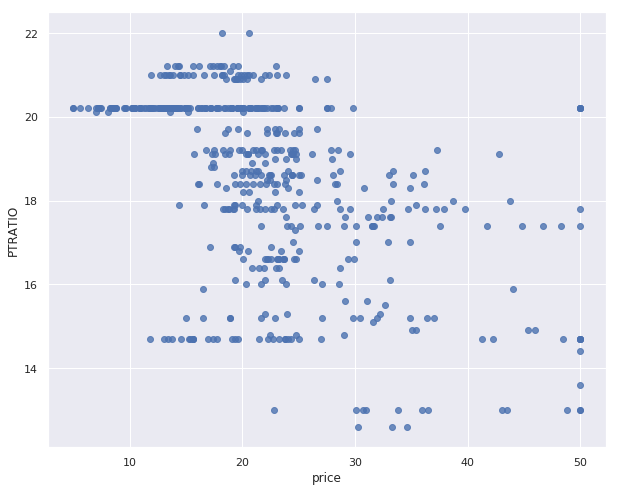

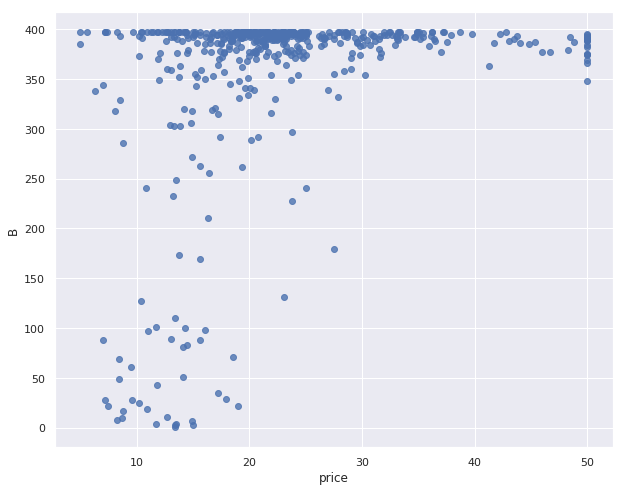

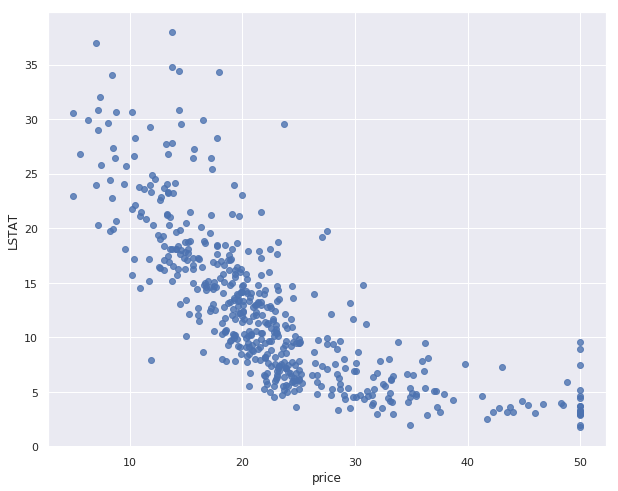

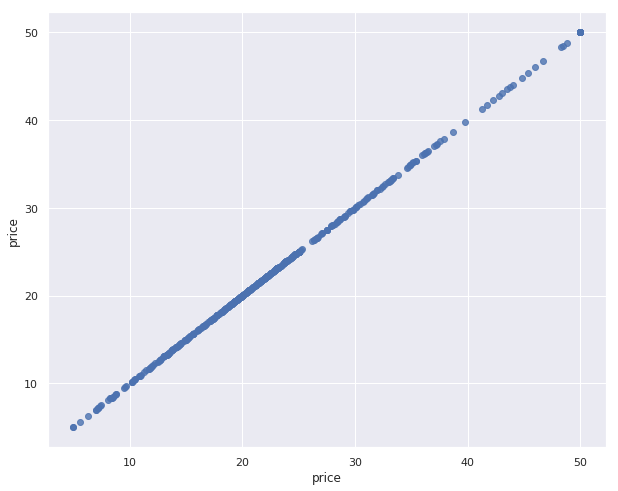

In [19]:
#以for迴圈跑出所有與price有關的散佈圖
#畫完之後可花點時間去查看其他欄位的相關性
#可以一一觀察各個欄位與房價的關聯
for i in df.columns:
    sns.regplot(df['price'], df[i], fit_reg=False)
    plt.show()

## 動動腦 - 1

剛剛您是否還有對其他欄位和房價的關係有所想法呢？    可以在上面的散佈圖中驗證一下自己的想法

## 動動腦 - 1 解答

- PTRATIO (學生/老師 比例)： 數值越高代表一名老師需要對應多名學生，教育品質會下降，因此在相同條件下房價應會較低 (負向關聯)
    - 單純看相關係數的話確實符合假設，觀察散佈圖時發現雖然大致上如此但PTRATIO的分佈並不自然。

## 除了只觀察房價跟其他欄位的關聯外，也可以用多變量圖觀察所有變項的關係

### 多變量圖(資料兩兩變項間的散佈圖)
- 接著繼續觀察其他feature之間的關聯
- sns.pairplot`並指定`data`，可以一次性畫出所有欄位之間的散佈圖，當兩軸欄位相同時顯示直方圖。


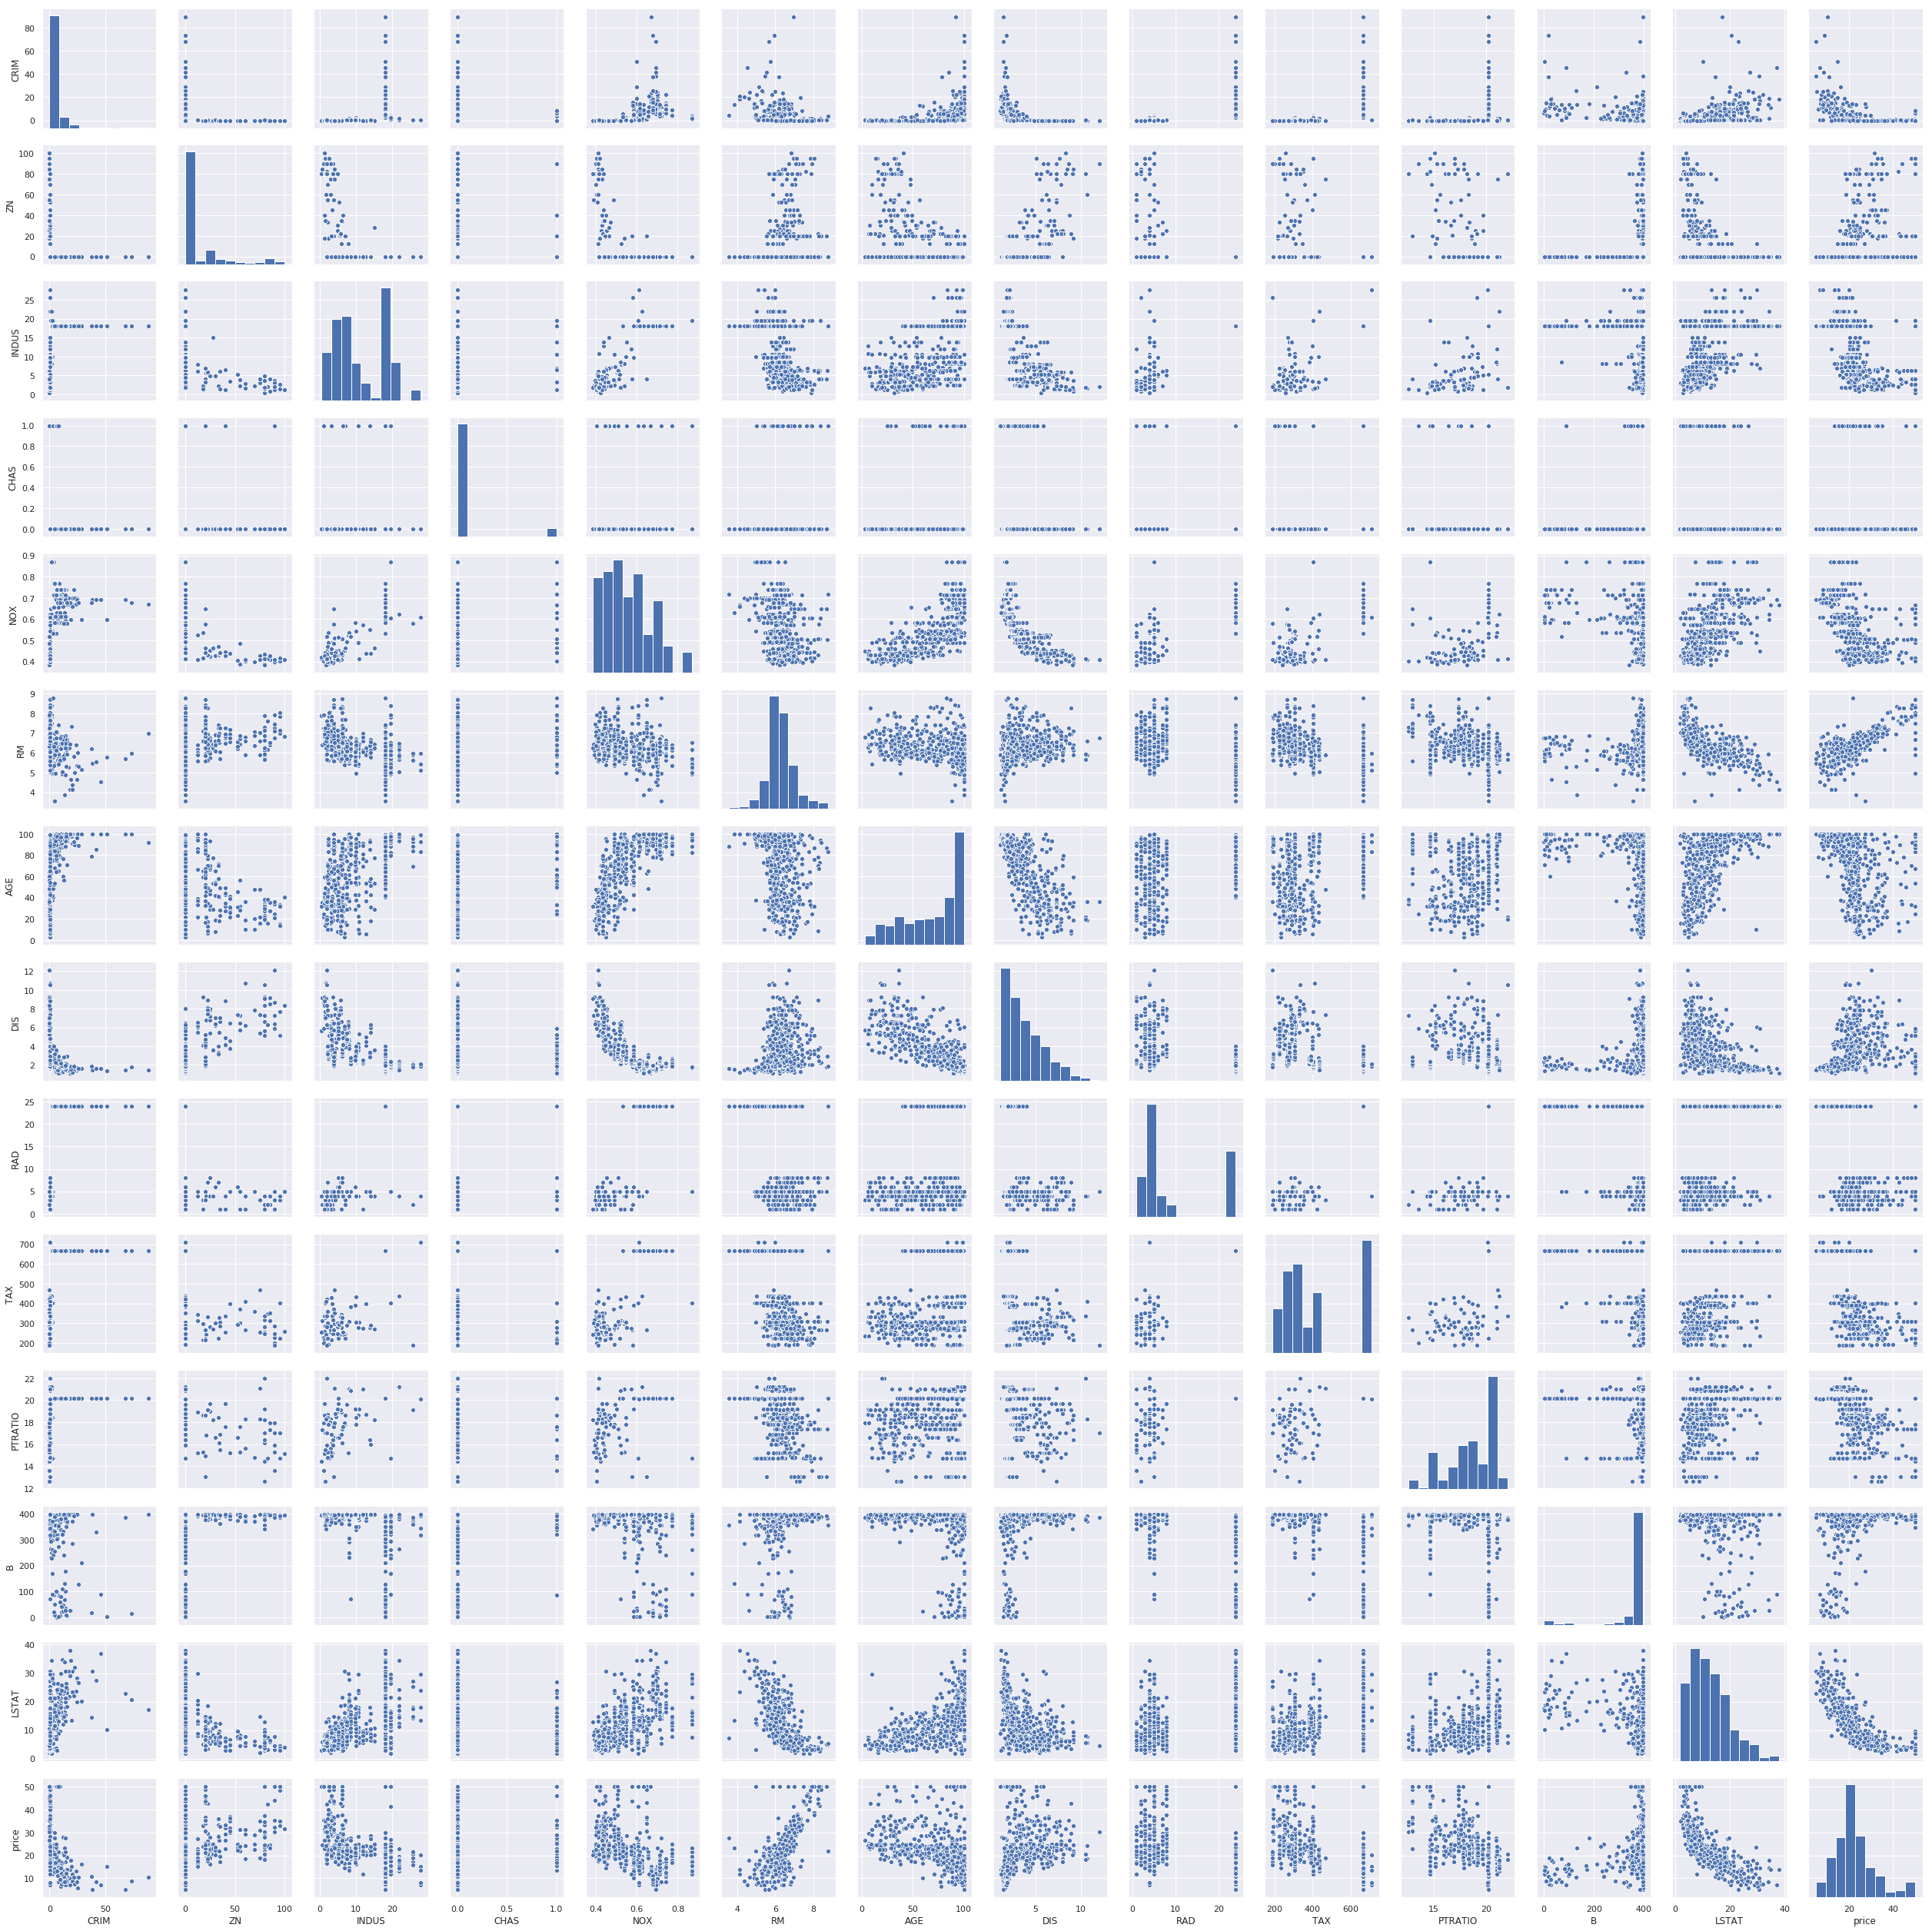

In [20]:
sns.pairplot(df)

## 其他特徵

為了方便觀察，我們在這邊只取NOX與INDUS兩個欄位繪製pairplot

- 氮化物濃度是否與區域工業比例有正相關？以下圖來觀察

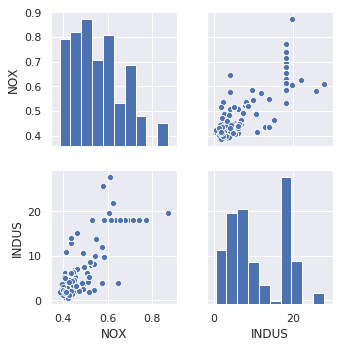

In [56]:
sns.pairplot(df[['NOX','INDUS']])

從圖中我們可以觀察到NOX與INDUS大致呈現正向關聯，另外也看到部分資料的INDUS數值呈現不自然的分佈。

## 其他特徵

- 開始探索區域工業比例(INDUS)的非自然現象探索
- 使用valu_counts函數統計數值

In [57]:
# 首先先看INDUS欄位究竟哪個數字最多
# 18.10這個比例的數字異常的多
df['INDUS'].value_counts().head()

18.10    132
19.58     30
8.14      22
6.20      18
21.89     15
Name: INDUS, dtype: int64

In [58]:
#將資料依照INDUS的數值額外做分類

#一般資料設為Normal
df['INDUS_GROUP'] = 'Normal'

#如果INDUS數值為18.10的資料，將其INDUS_GROUP數值改為'Special_region'
df.loc[df['INDUS']==18.10,'INDUS_GROUP'] = 'Special_region'

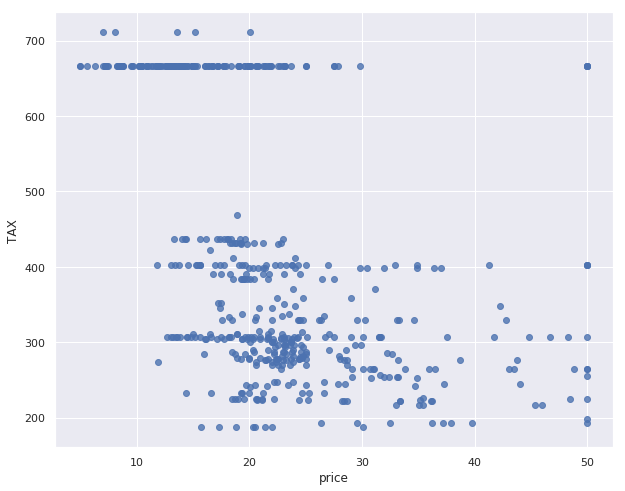

In [60]:
# TAX稅率
sns.regplot(x = 'price', y = 'TAX', data = df, fit_reg = False)

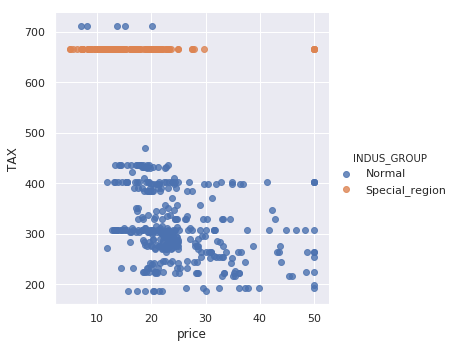

In [61]:
#觀察其他欄位與房價的散佈圖，並以不同顏色代替不同"GROUP"組別
#因為我們想以顏色區分不同的資料因此使用lmplot
sns.lmplot(x = 'price', y = 'TAX', hue = 'INDUS_GROUP', data = df, fit_reg = False)

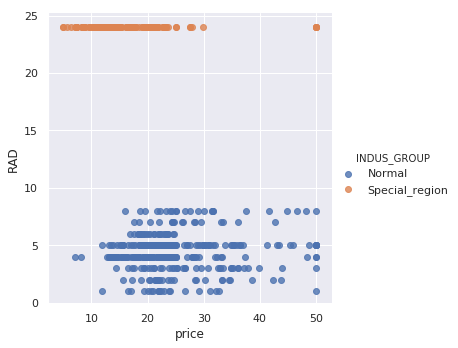

In [62]:
#觀察其他欄位與房價的散佈圖，並以不同顏色代替不同"GROUP"組別
sns.lmplot(x = 'price', y = 'RAD', hue = 'INDUS_GROUP', data = df, fit_reg = False)

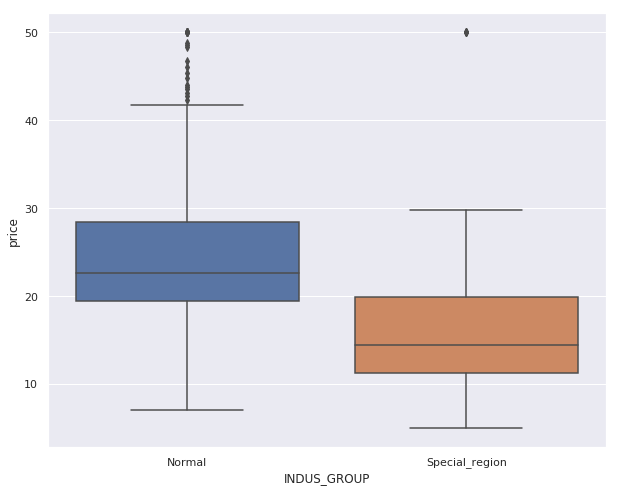

In [63]:
#用boxplot直接觀察特殊區域的房價是否跟一般區域分布有所不同，可看出spiceal_region的對應price偏低
sns.boxplot(x = 'INDUS_GROUP', y = 'price', data = df)

除了原本的欄位與房價的關聯，額外探索不同欄位之間的關聯亦有可能讓我們發現額外的資訊。

以此次發現的組別來判斷，部分區域的性質可能極為特殊(高交通便利性、高工業比例、且數值皆一致，較類似法規強制規定)，雖可猜測這些區域可能為特別設置的工業區，後續仍然需要其他資訊做佐證。

## 動手做做看1
以`df` 繪製 `CRIM` 與 `LSTAT` 的regplot與pairplot

### 練習時間解答 1

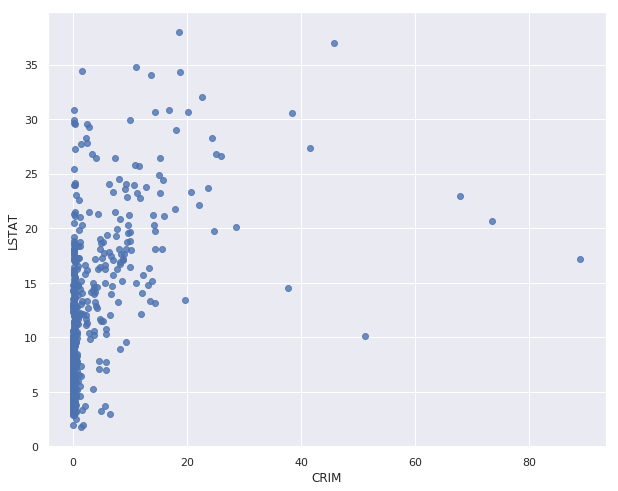

In [25]:
#可以觀察到社會地位與犯罪率有些正向關聯，但仍可以觀察到一些離群值
sns.regplot(df['CRIM'],df['LSTAT'],fit_reg=False)

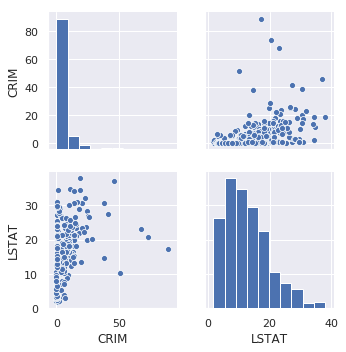

In [26]:
sns.pairplot(df[['CRIM','LSTAT']])

## 是否資料探索都用pairplot / 迴圈從頭看到尾就行了?

並不是的，有時基本的散佈圖仍然會造成誤判

### 案例一：稅收與交通便利性的散佈圖似乎有特別的分布?

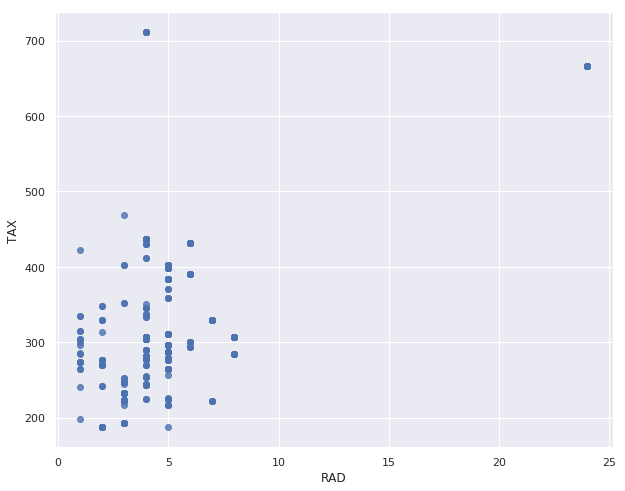

In [64]:
#觀察的時候可發現有兩個比較離群的值
sns.regplot(df['RAD'], df['TAX'], fit_reg = False)

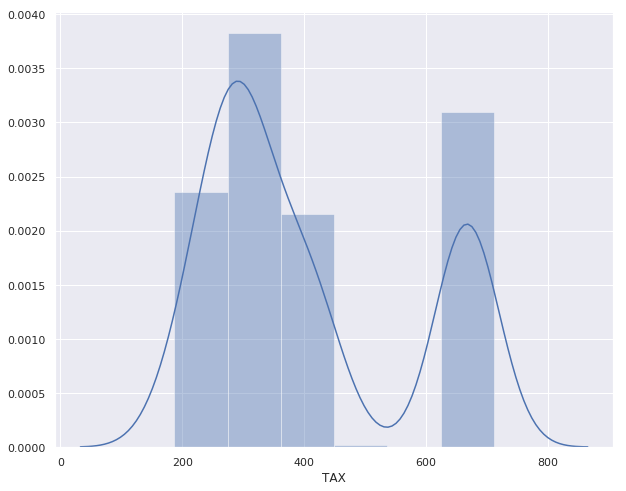

In [65]:
#與上面做比較，會發現分佈有些不一樣
sns.distplot(df['TAX'])

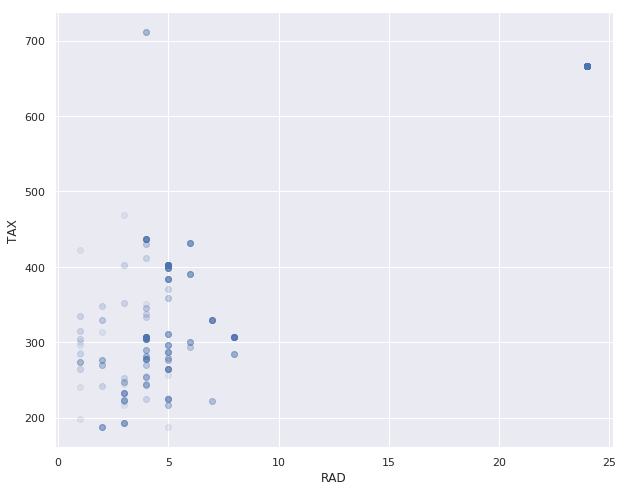

In [66]:
#為了觀察出兩者的差異，我們設定alpha值去觀察資料的重疊性(越深代表越多資料重疊在同一點，設0.1為透明度)
sns.regplot(df['RAD'], df['TAX'], fit_reg = False, scatter_kws = {'alpha':0.1})

### 案例二：在查爾斯河旁的房屋有甚麼樣的性質?

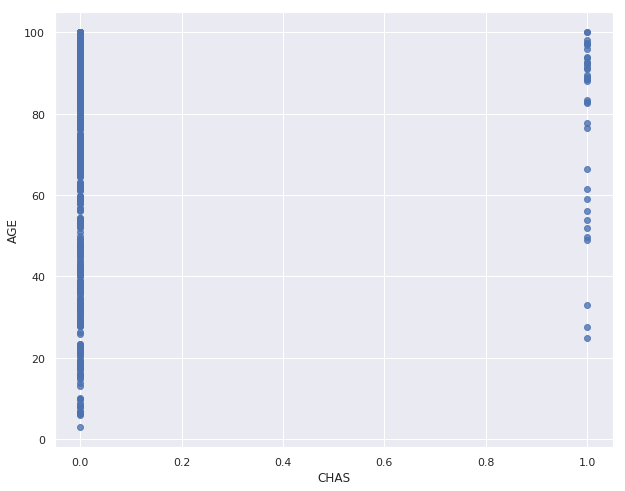

In [67]:
#查爾斯河與屋齡去做散佈觀察，會發現並無相關
sns.regplot(df['CHAS'], df['AGE'], fit_reg = False)

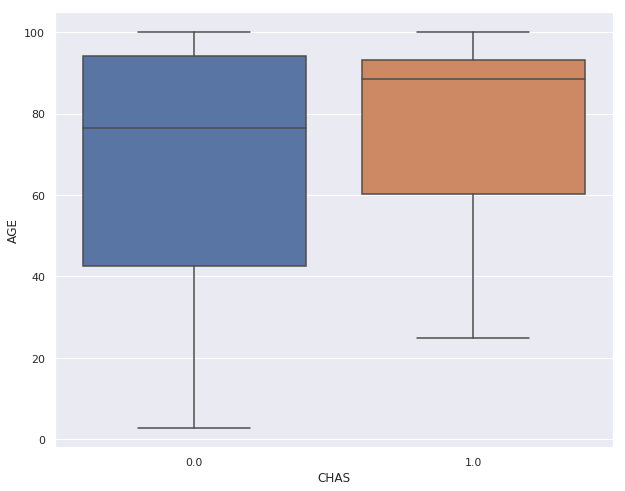

In [68]:
#較適合的方式是畫盒形圖
sns.boxplot(x='CHAS', y = 'AGE', data = df)

## 小結

從上面的資料探索我們發現到甚麼？

- 房價金額跟居住環境相關等變項的關係我們的假設較準確： 低收入鄰居比例、犯罪率、房間數量
- 相對的，與政策規定或是都市發展相關的變項關係則未符合原先假設，且資料分布較特殊，需要後續的領域知識補足，或是有更多資料來源才可做判斷

# 切分資料集成訓練集/測試集

做完資料探索分析以後我們可以來實際的做一個簡單的模型來看看是否可預測房價

![title](https://i.stack.imgur.com/pXAfX.png)

首先先切分資料集微訓練及與測試集
*   test_size表示測試集在資料庫的比重 ( 通常設定0.2~0.3 )
*   shuffle = True代表打亂順序
*   可以觀察training data 與 test data 的shape發生變化

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(house_price.data, house_price.target, test_size=0.3, random_state= 0, shuffle=True)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(354, 13) (152, 13)
(354,) (152,)


In [73]:
#X_train

array([[1.62864e+00, 0.00000e+00, 2.18900e+01, ..., 2.12000e+01,
        3.96900e+02, 3.44100e+01],
       [1.14600e-01, 2.00000e+01, 6.96000e+00, ..., 1.86000e+01,
        3.94960e+02, 7.73000e+00],
       [5.57780e-01, 0.00000e+00, 2.18900e+01, ..., 2.12000e+01,
        3.94670e+02, 1.69600e+01],
       ...,
       [1.50980e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
        3.94510e+02, 1.03000e+01],
       [2.29270e-01, 0.00000e+00, 6.91000e+00, ..., 1.79000e+01,
        3.92740e+02, 1.88000e+01],
       [1.39140e-01, 0.00000e+00, 4.05000e+00, ..., 1.66000e+01,
        3.96900e+02, 1.46900e+01]])

# 訓練流程
1. 選擇模型
2. 建立模型
3. 訓練模型
4. 模型預測


# 模型套用 - 簡單線性回歸
- 首先使用早上所說的LinearRegression來試試看

In [76]:
import numpy as np
from sklearn.linear_model import LinearRegression #選擇模型
model = LinearRegression()#建立模型
#model.fit(X_train,y_train)#訓練模型

In [77]:
model.fit(X_train,y_train)#訓練模型

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
y_test_pred = model.predict(X_test)#模型預測
#y_test_pred

array([24.9357079 , 23.75163164, 29.32638296, 11.97534566, 21.37272478,
       19.19148525, 20.5717479 , 21.21154015, 19.04572003, 20.35463238,
        5.44119126, 16.93688709, 17.15482272,  5.3928209 , 40.20270696,
       32.31327348, 22.46213268, 36.50124666, 31.03737014, 23.17124551,
       24.74815321, 24.49939403, 20.6595791 , 30.4547583 , 22.32487164,
       10.18932894, 17.44286422, 18.26103077, 35.63299326, 20.81960303,
       18.27218007, 17.72047628, 19.33772473, 23.62254823, 28.97766856,
       19.45036239, 11.13170639, 24.81843595, 18.05294835, 15.59712226,
       26.21043403, 20.81140432, 22.17349382, 15.48367365, 22.62261604,
       24.88561528, 19.74754478, 23.0465628 ,  9.84579105, 24.36378793,
       21.47849008, 17.62118176, 24.39160873, 29.95102691, 13.57219422,
       21.53645439, 20.53306273, 15.03433182, 14.3232289 , 22.11929299,
       17.07321915, 21.54141094, 32.96766968, 31.371599  , 17.7860591 ,
       32.75069556, 18.74795323, 19.21428022, 19.41970047, 23.08

# 模型成效檢驗 Evaluation

評量指標參考 - https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/404042/

In [80]:
print("Mean squared error, MSE: %.2f" % np.mean((y_test_pred - y_test) ** 2))

Mean squared error, MSE: 27.20


In [81]:
from sklearn import metrics
print('R2 score:%.2f'%metrics.r2_score(y_test, y_test_pred))

R2 score:0.67


# 新增特徵
加入以下特徵
<br>ZN-DIS(住宅用地比例-到波士頓就業中心的加權距離)
<br>LSTAT-NOX(地位較低人士所占百分比-氮氧化物濃度)
<br>CHAS-NOX(查爾斯河通過與否-氮氧化物濃度)
<br>AGE-NOX(1940年前屋主即擁有土地比例-氮氧化物濃度)

In [83]:
#sns.pairplot(df[['ZN','DIS']])

In [85]:
#sns.pairplot(df[['LSTAT','NOX']])

In [56]:
# boston = load_boston()
#np.hstack((boston.data[0], [1],[2]))

array([6.32000000e-03, 1.80000000e+01, 2.31000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.57500000e+00, 6.52000000e+01, 4.09000000e+00,
       1.00000000e+00, 2.96000000e+02, 1.53000000e+01, 3.96900000e+02,
       4.98000000e+00, 4.40097800e+00, 7.79220779e+00, 7.57414449e-01,
       0.00000000e+00, 1.21189591e+02, 1.00000000e+00, 2.00000000e+00])

In [86]:
import numpy as np
from  sklearn.datasets import load_boston
boston = load_boston()
boston.data = np.array([np.hstack([boston.data[i],boston.data[i][1]/boston.data[i][7],
                                  boston.data[i][1]/boston.data[i][2],boston.data[i][12]/boston.data[i][5],
                                  boston.data[i][3]/boston.data[i][4],boston.data[i][6]/boston.data[i][4]])
                        for i in range(boston.data.shape[0])])

print("feature number:",len(boston.data[0]))

feature number: 18


# 重新訓練模型

In [87]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(boston.data, boston.target, test_size=0.3, random_state= 0, shuffle=True)
print(X_train_new.shape, X_test_new.shape)
print(y_train_new.shape, y_test_new.shape)

(354, 18) (152, 18)
(354,) (152,)


In [88]:
model = LinearRegression()
model.fit(X_train_new,y_train_new)
y_test_pred_new = model.predict(X_test_new)
print('train evaluation :')
print("Mean squared error, MSE: %.2f" % np.mean((y_test_new - y_test_pred_new) ** 2))
print('R2 score:%.2f'%metrics.r2_score(y_test_new, y_test_pred_new))

train evaluation :
Mean squared error, MSE: 22.22
R2 score:0.73


# 那如果 我們再增加更多feature呢？

In [89]:
from  sklearn.datasets import load_boston
boston = load_boston()
boston.data = [np.hstack([boston.data[i],np.log(boston.data[i]+1),
                                   np.power(boston.data[i],2),np.power(boston.data[i],3),
                                   np.power(boston.data[i],4),np.power(boston.data[i],5),
                                   np.power(boston.data[i],6),np.power(boston.data[i],7)])
                        for i in range(boston.data.shape[0])]

print("feature number:",len(boston.data[0]))

feature number: 104


In [90]:
pd.DataFrame(boston.data).head(5)

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,0.0,0.013046,531214.963744,5.008794e+12,19145.343205,1.0,1.990866e+17,1.962637e+08,1.551557e+18,7.596358e+04
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,0.0,0.004991,450006.399017,1.903439e+13,74596.821765,128.0,4.860798e+16,5.661611e+08,1.551557e+18,5.328726e+06
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,0.0,0.004991,988524.431202,3.178985e+12,74596.821765,128.0,4.860798e+16,5.661611e+08,1.443552e+18,1.726376e+04
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,0.0,0.004227,821897.325116,4.227254e+11,300892.817875,2187.0,2.657485e+16,7.996340e+08,1.490496e+18,1.898591e+03
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,0.0,0.004227,952503.268683,1.374026e+12,300892.817875,2187.0,2.657485e+16,7.996340e+08,1.551557e+18,1.222054e+05


In [91]:
X_train_new2, X_test_new2, y_train_new2, y_test_new2 = train_test_split(boston.data, boston.target, test_size=0.3, random_state= 0, shuffle=True)

In [92]:
model = LinearRegression()
model.fit(X_train_new2,y_train_new2)
y_test_pred_new2 = model.predict(X_test_new2)
print('train evaluation :')
print("Mean squared error, MSE: %.2f" % np.mean((y_test_new2 - y_test_pred_new2 ) ** 2))
print('R2 score:%.2f'%metrics.r2_score(y_test_new2, y_test_pred_new2))

train evaluation :
Mean squared error, MSE: 32.61
R2 score:0.61


# 由於過多無意義的feature，造成了overfitting，因此並不是越多feature越好

# Lasso - Regularization

In [93]:
X_train_new2, X_test_new2, y_train_new2, y_test_new2 = train_test_split(boston.data, boston.target, test_size=0.3, random_state= 0, shuffle=True)

In [94]:
from sklearn.linear_model import Lasso,Ridge

## 請嘗試調整模型的alpha值
model = Lasso(alpha = 100,tol = 1)
model.fit(X_train_new2,y_train_new2)
y_test_pred_lasso = model.predict(X_test_new2)
print('train evaluation :')
print("Mean squared error, MSE: %.2f" % np.mean((y_test_pred_lasso - y_test_new2) ** 2))
print('R2 score:%.2f'%metrics.r2_score(y_test_new2, y_test_pred_lasso))

train evaluation :
Mean squared error, MSE: 29.76
R2 score:0.64


# Ridge- Regularization

In [95]:
X_train_new2, X_test_new2, y_train_new2, y_test_new2 = train_test_split(boston.data, boston.target, test_size=0.3, random_state= 0, shuffle=True)

In [97]:
## 請嘗試調整模型的alpha值
model = Ridge(alpha = 0.1)
model.fit(X_train_new2,y_train_new2)
y_test_pred_Ridge = model.predict(X_test_new2)
print('train evaluation :')
print("Mean squared error, MSE: %.2f" % np.mean((y_test_pred_Ridge - y_test_new2) ** 2))
print('R2 score:%.2f'%metrics.r2_score(y_test_new2, y_test_pred_Ridge))

train evaluation :
Mean squared error, MSE: 42.90
R2 score:0.48


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.5567e-43): result may not be accurate.
  overwrite_a=True).T
